# Signal Analysis for LPBF Experiments

## Introduction

This code snippet is designed to process and visualize signal data from Laser Powder Bed Fusion (LPBF) experiments conducted on Ti-6Al-4V. It focuses on analyzing the signals recorded during the printing process for different laser parameters.

### Code Overview:

1. **Data Loading**:
   - Loads experiment parameters from an Excel file ('experiment_parameters.xlsx')
   - Each sheet in the Excel file corresponds to a different cube (sample)
   - Parameters include laser speed, power, and power percentage for each condition

2. **Signal Processing**:
   - Reads signal data from CSV files located in './Data/Neuchatel_Ti64'
   - Processes data for two channels (channel_0 and channel_1): optical reflection and emission, respectively
   - Calculates time array based on a sampling rate of 200,000 Hz

3. **Visualization**:
   - Creates a large figure with subplots for each condition and channel
   - Plots signal amplitude over time for each condition
   - Labels subplots with corresponding laser parameters (speed and power)

4. **Functionality**:
   - The `plot_cube_signals()` function generates plots for a specified cube number
   - In this instance, it's set to analyze Cube1

This code provides a comprehensive view of the signals recorded during the LPBF process, allowing for comparison across different laser parameters and experimental conditions. The resulting visualizations will help in identifying patterns or anomalies in the signals that may correlate with different melting regimes or process outcomes.


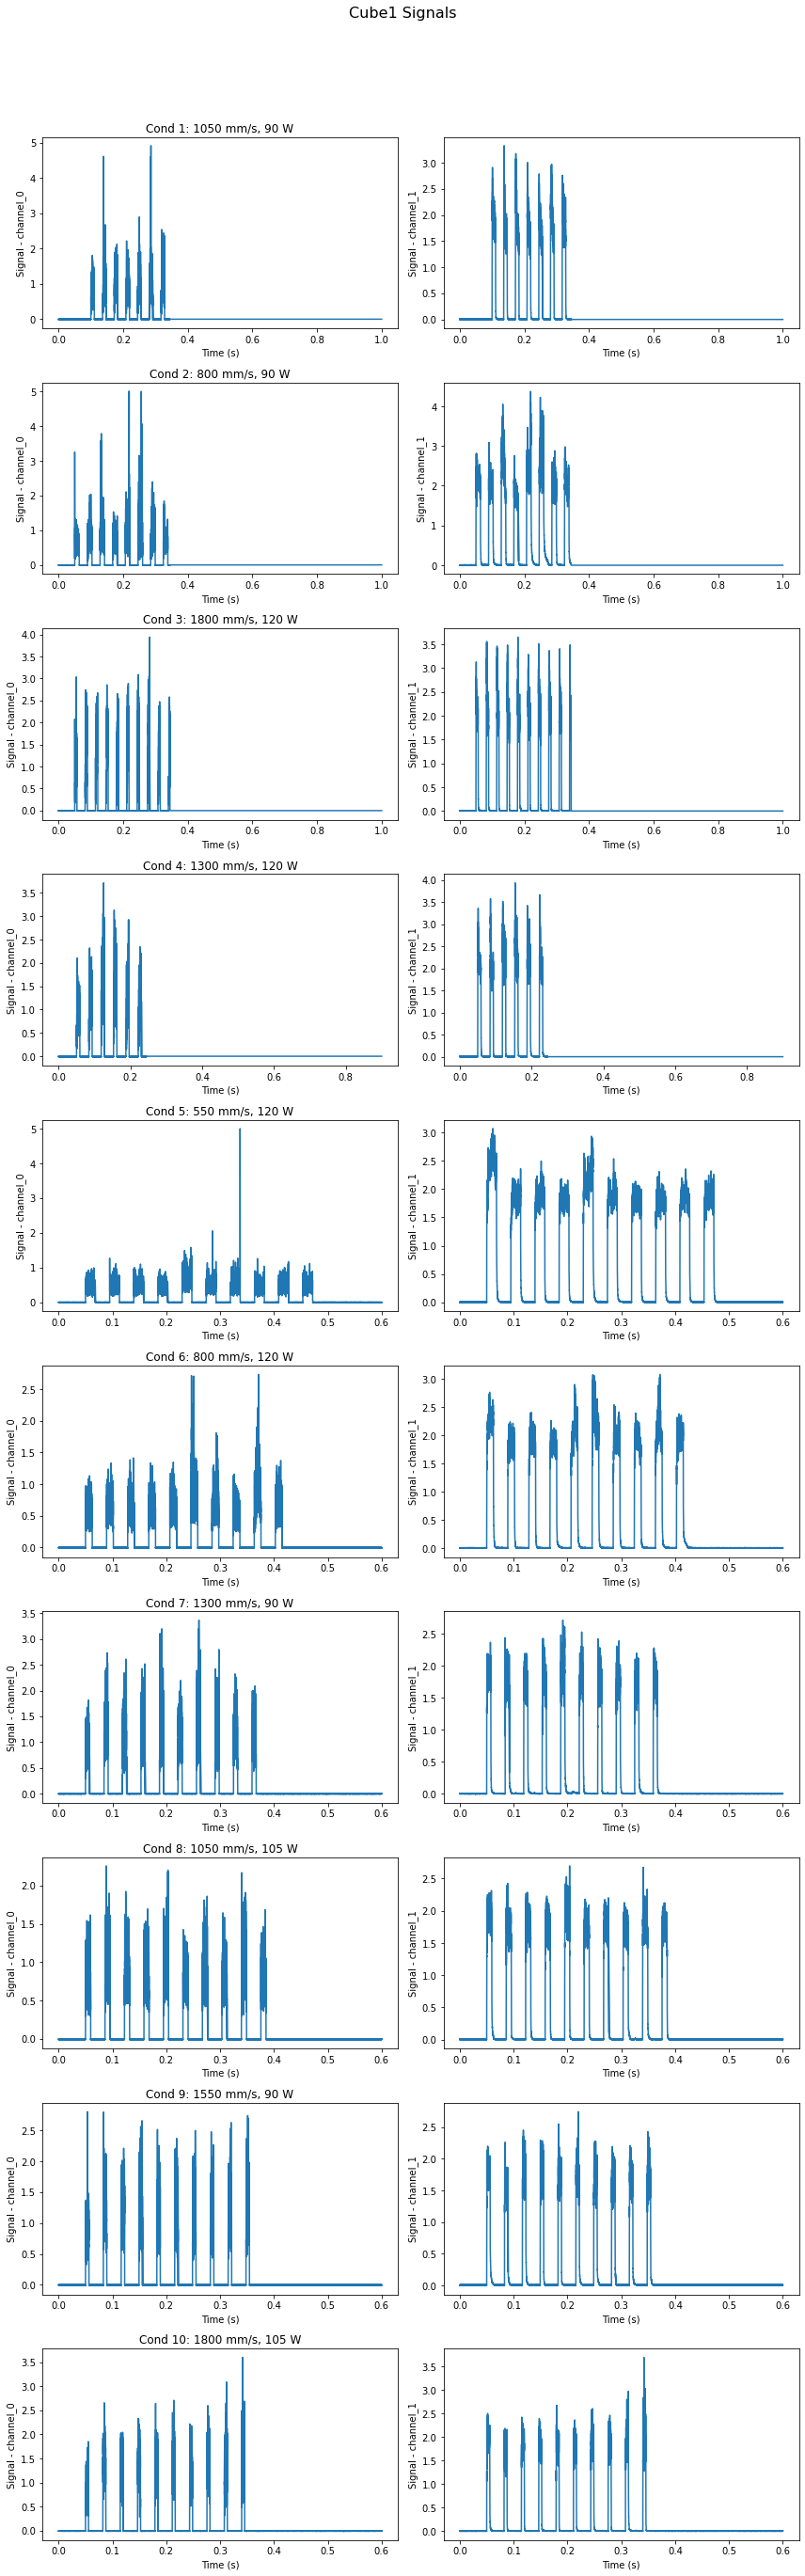

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Path to the Excel file with parameters
excel_path = './experiment_parameters.xlsx'  
xl = pd.ExcelFile(excel_path)

# Load parameters from Excel into a dictionary
params_dict = {}
for sheet_name in xl.sheet_names:
    df = xl.parse(sheet_name)
    # Assuming the Excel sheet has columns 'Speed (mm/s)', 'Power (W)', and 'Power perc (%)' for each condition
    params_dict[sheet_name] = df[['Speed (mm/s)', 'Power (W)', 'Power perc (%)']].to_dict('records')

# Path to data
base_path = './Data/Neuchatel_Ti64/'

def plot_cube_signals(cube_number):
    cube_name = f'Cube{cube_number}'  # Construct cube name
    cube_path = os.path.join(base_path, cube_name)
    channels = ['channel_0', 'channel_1']
    
    # Sampling rate and time step calculation
    sampling_rate = 200000  # 200,000 Hz
    time_step = 1 / sampling_rate  # Time step in seconds

    # 10 conditions, with 2 subplots (for channels 0 and 1) per condition
    fig, axes = plt.subplots(10, 2, figsize=(12, 40))  
    fig.suptitle(f'{cube_name} Signals', fontsize=16)
    
    for i in range(10):  # 10 files per condition
        for j, channel in enumerate(channels):
            file_path = os.path.join(cube_path, channel, f'File_{i}.csv')
            data = pd.read_csv(file_path).values
            
            # Create a time array for the x-axis
            time_array = np.arange(0, len(data) * time_step, time_step)
            
            # Ensure time_array is the same length as data
            time_array = time_array[:len(data)]
            
            # Plotting
            ax = axes[i, j]
            ax.plot(time_array, data)
            param_set = params_dict[cube_name][i]  # Retrieve parameters for this condition
            if j == 0:
                ax.set_title(f'Cond {i+1}: {int(param_set["Speed (mm/s)"])} mm/s, {int(param_set["Power (W)"])} W')
            ax.set_xlabel('Time (s)')
            ax.set_ylabel(f'Signal - {channel}')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.show()

plot_cube_signals(1)


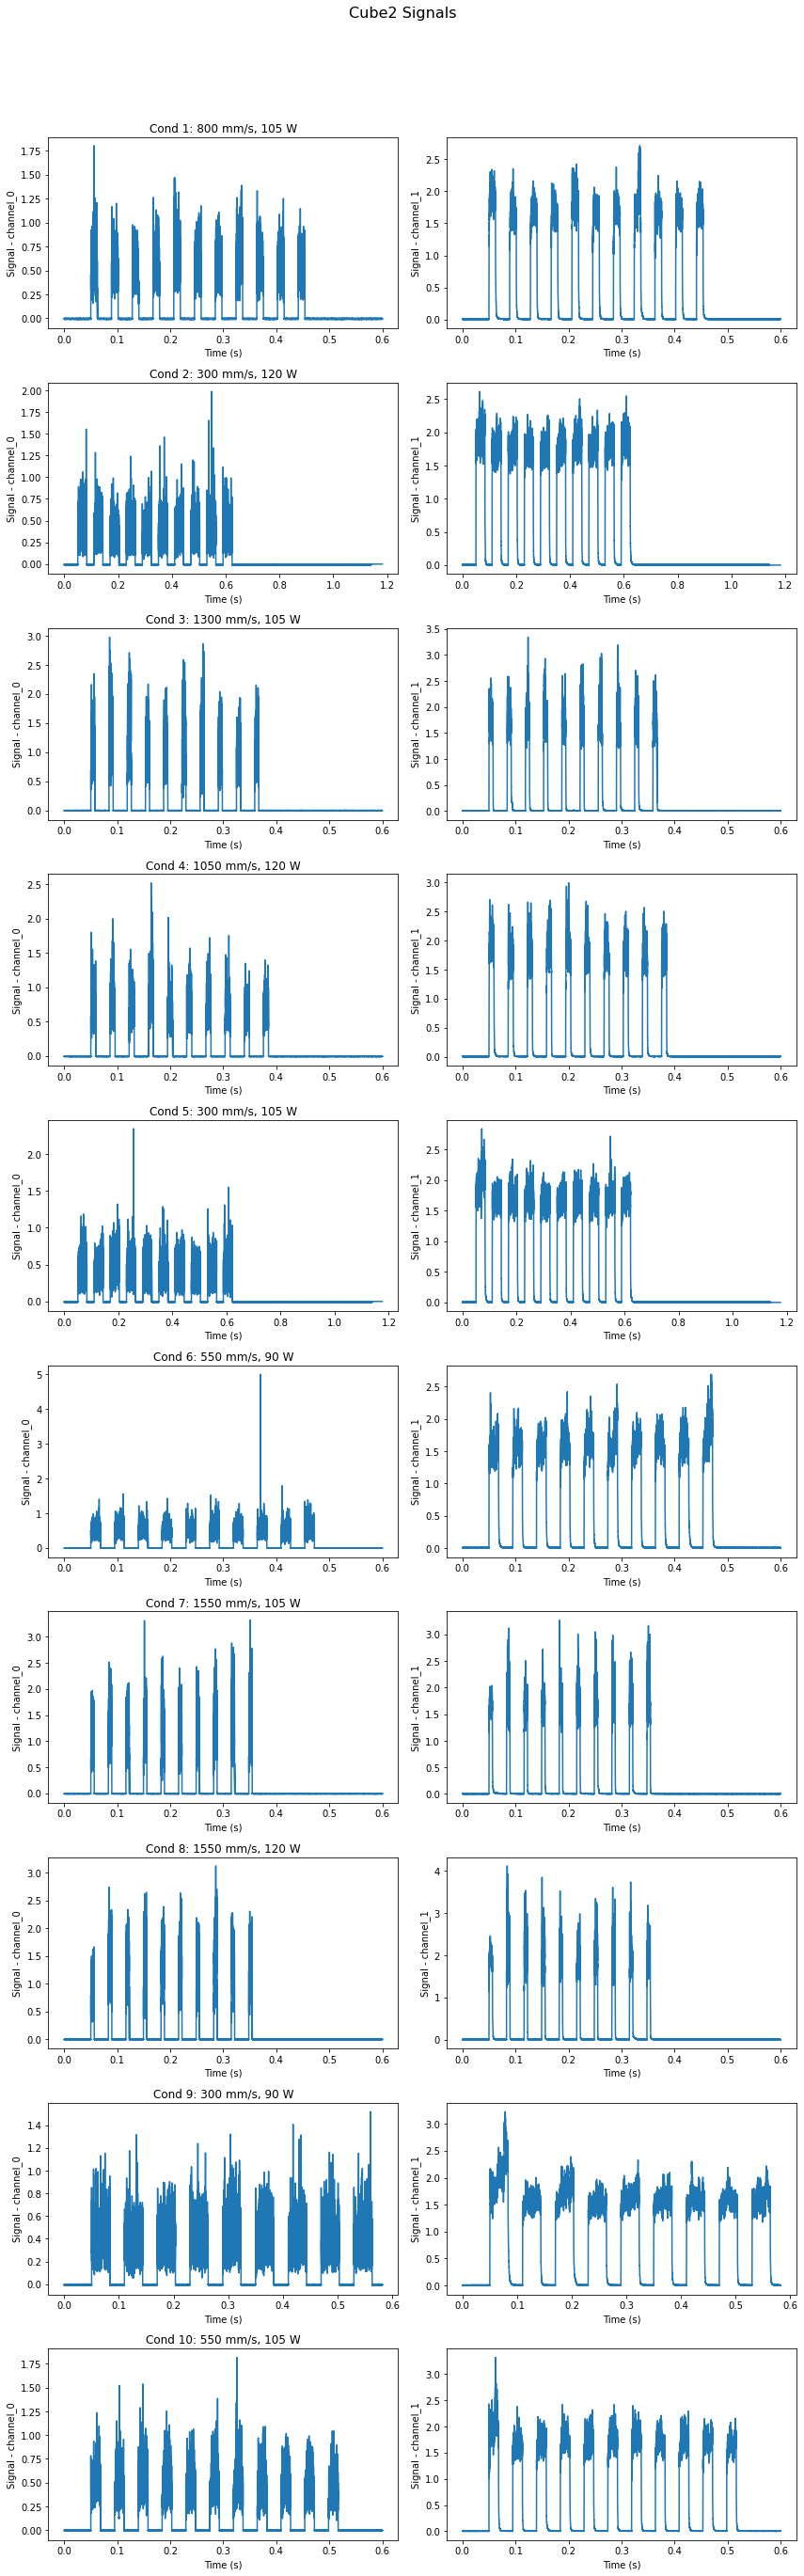

In [2]:
plot_cube_signals(2) # Cube B 


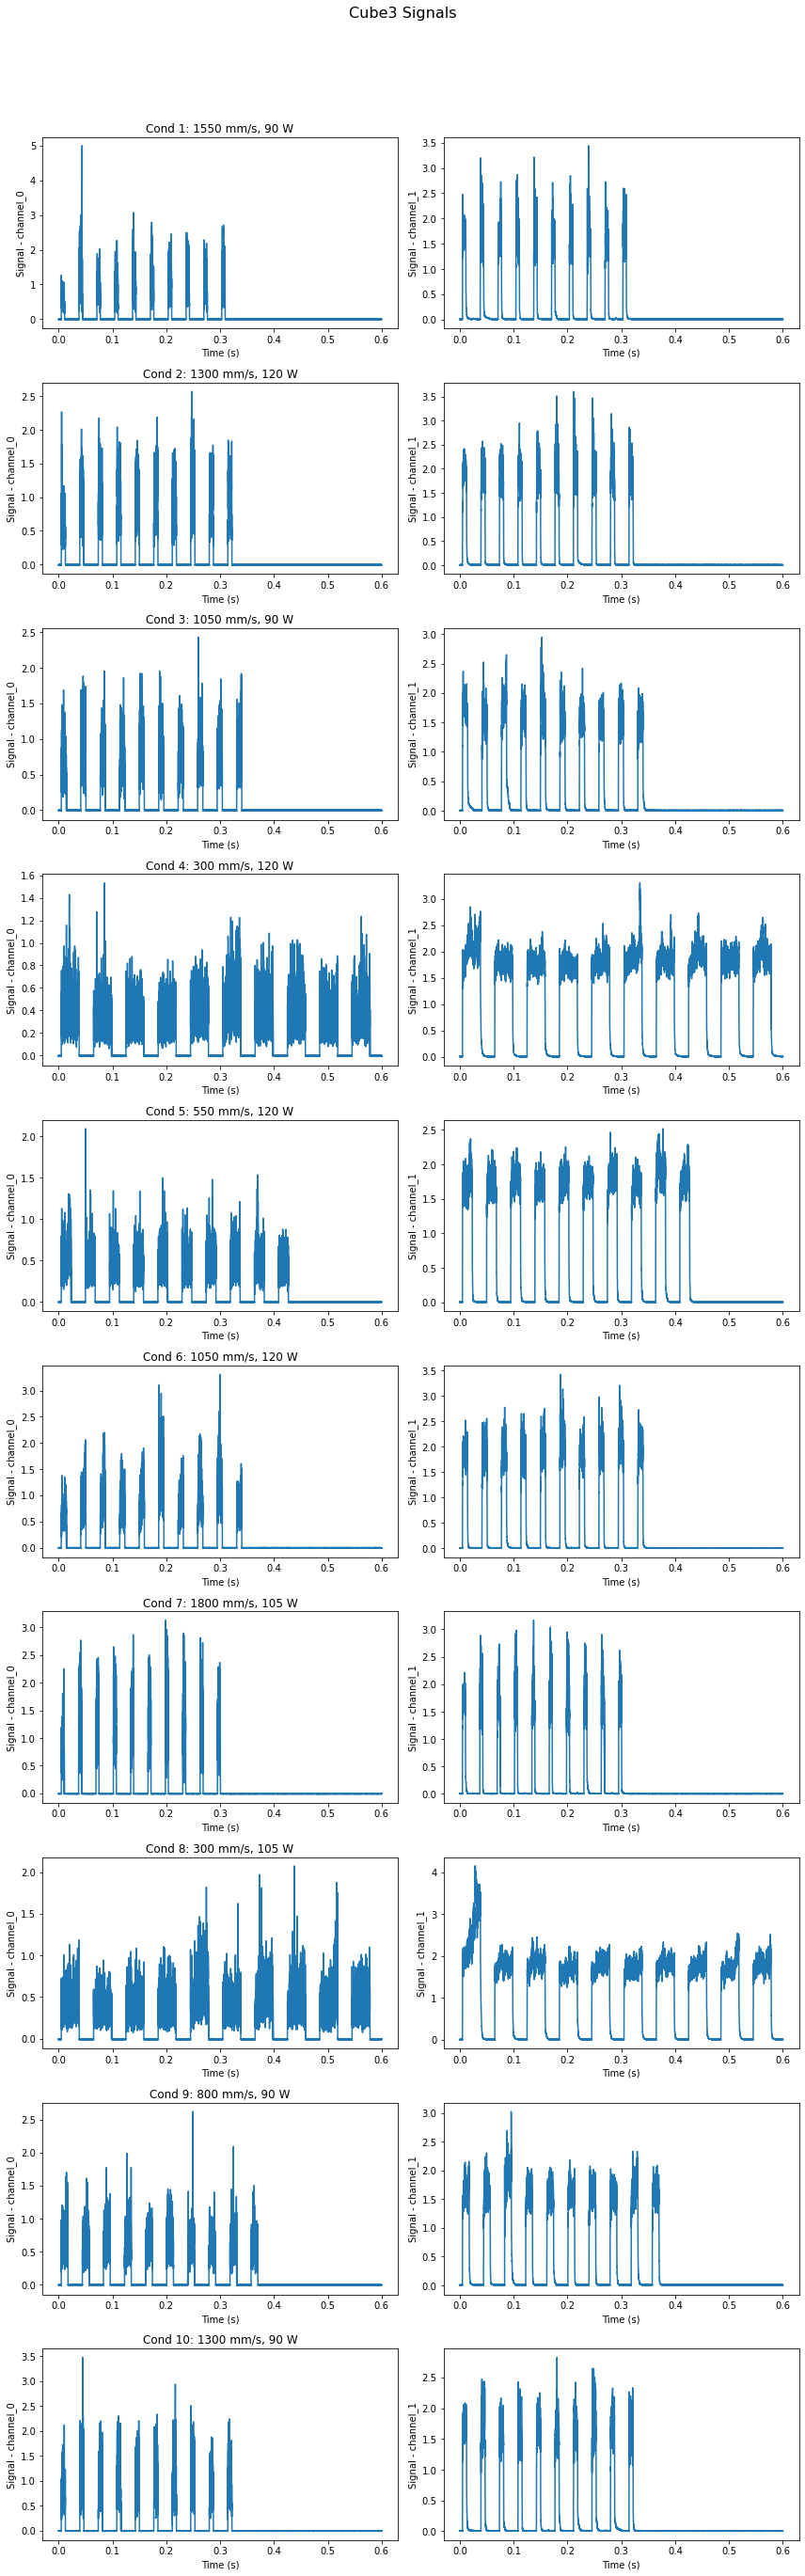

In [3]:
plot_cube_signals(3) # Cube C


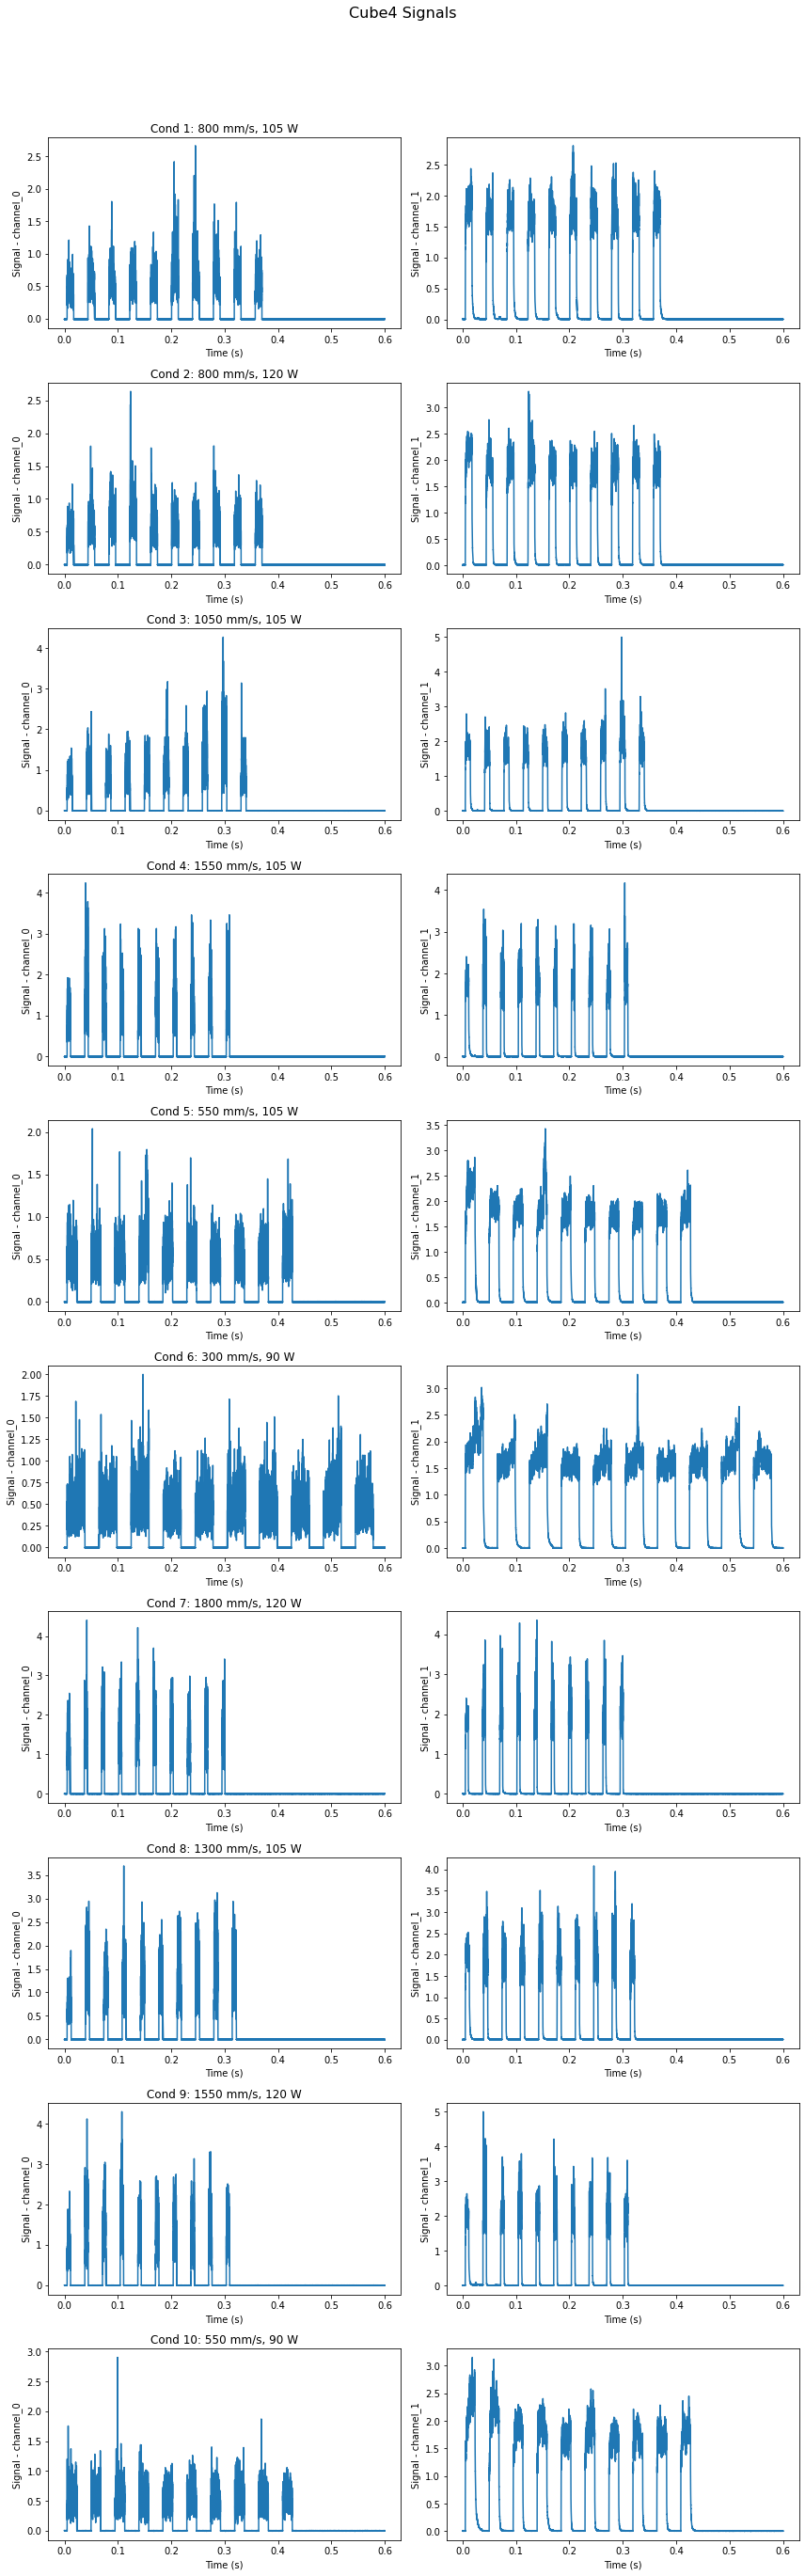

In [4]:
plot_cube_signals(4) # Cube D


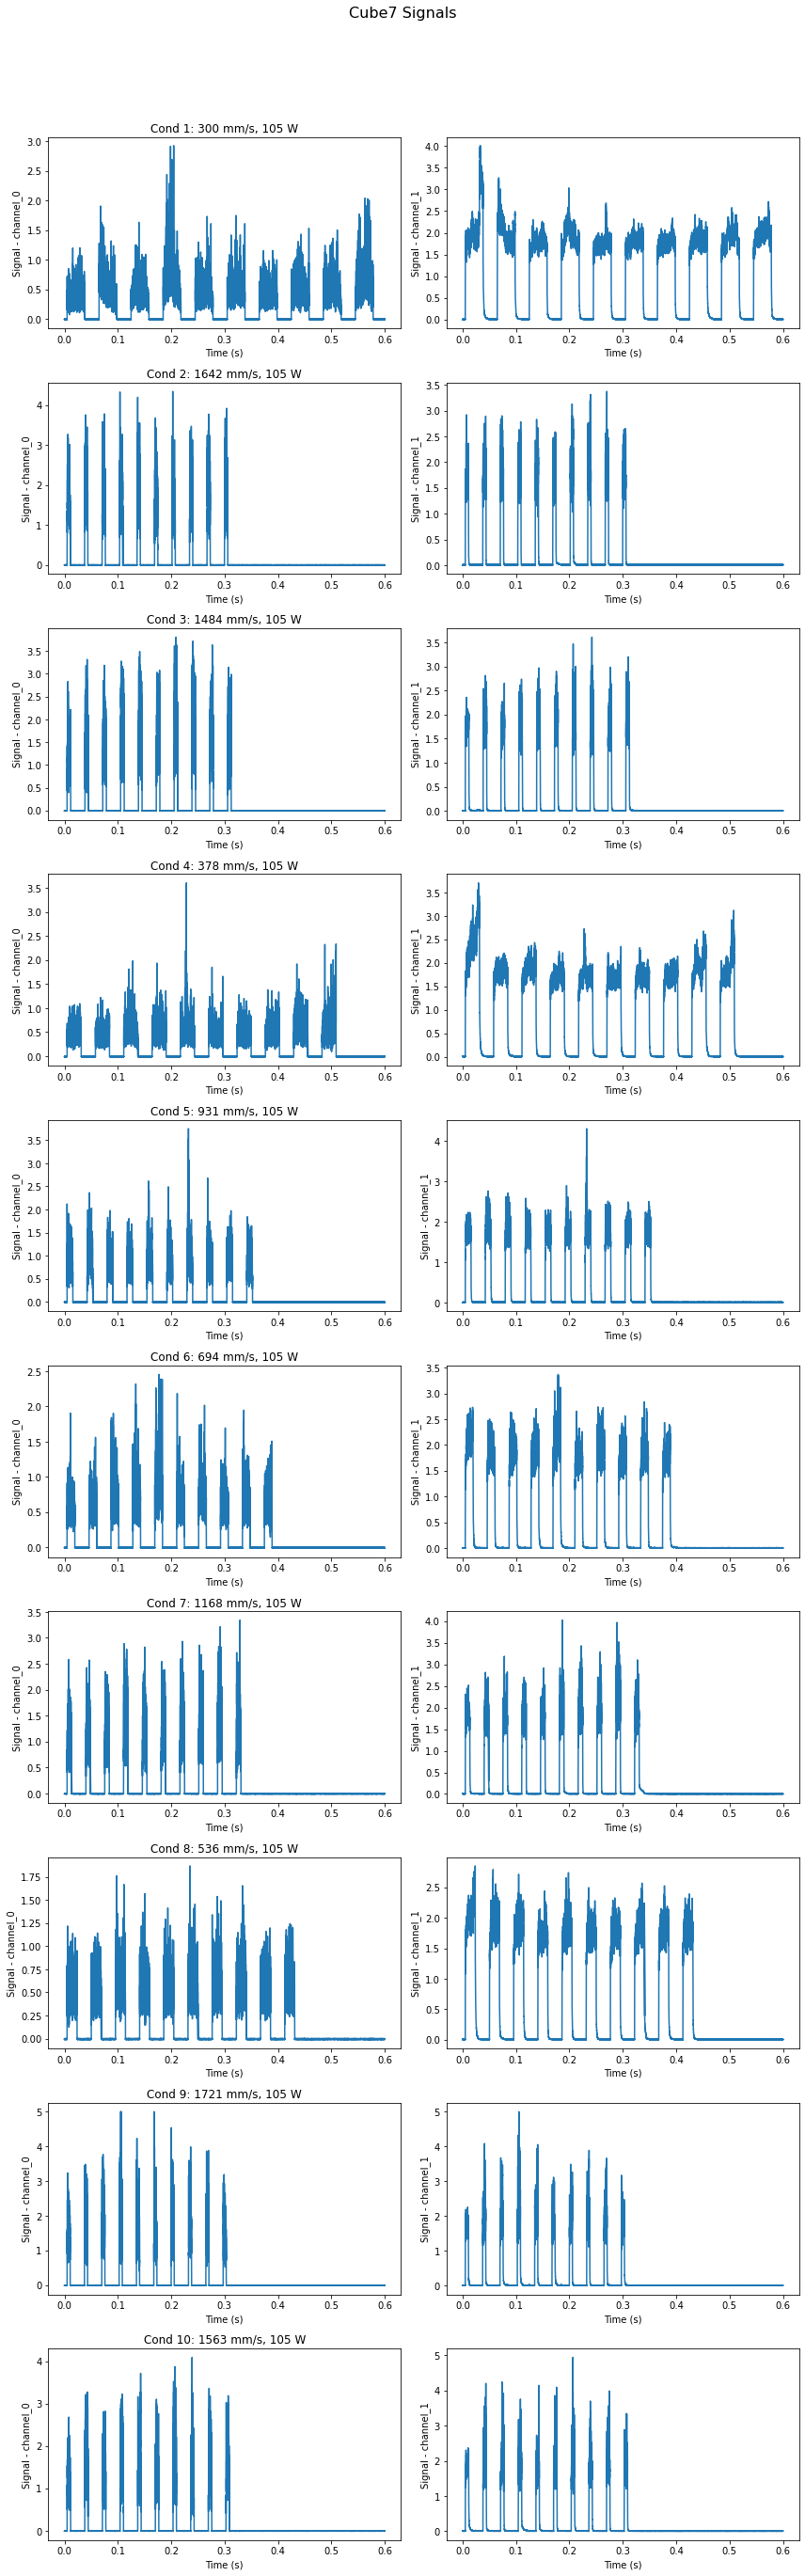

In [5]:
plot_cube_signals(7) # Cube E


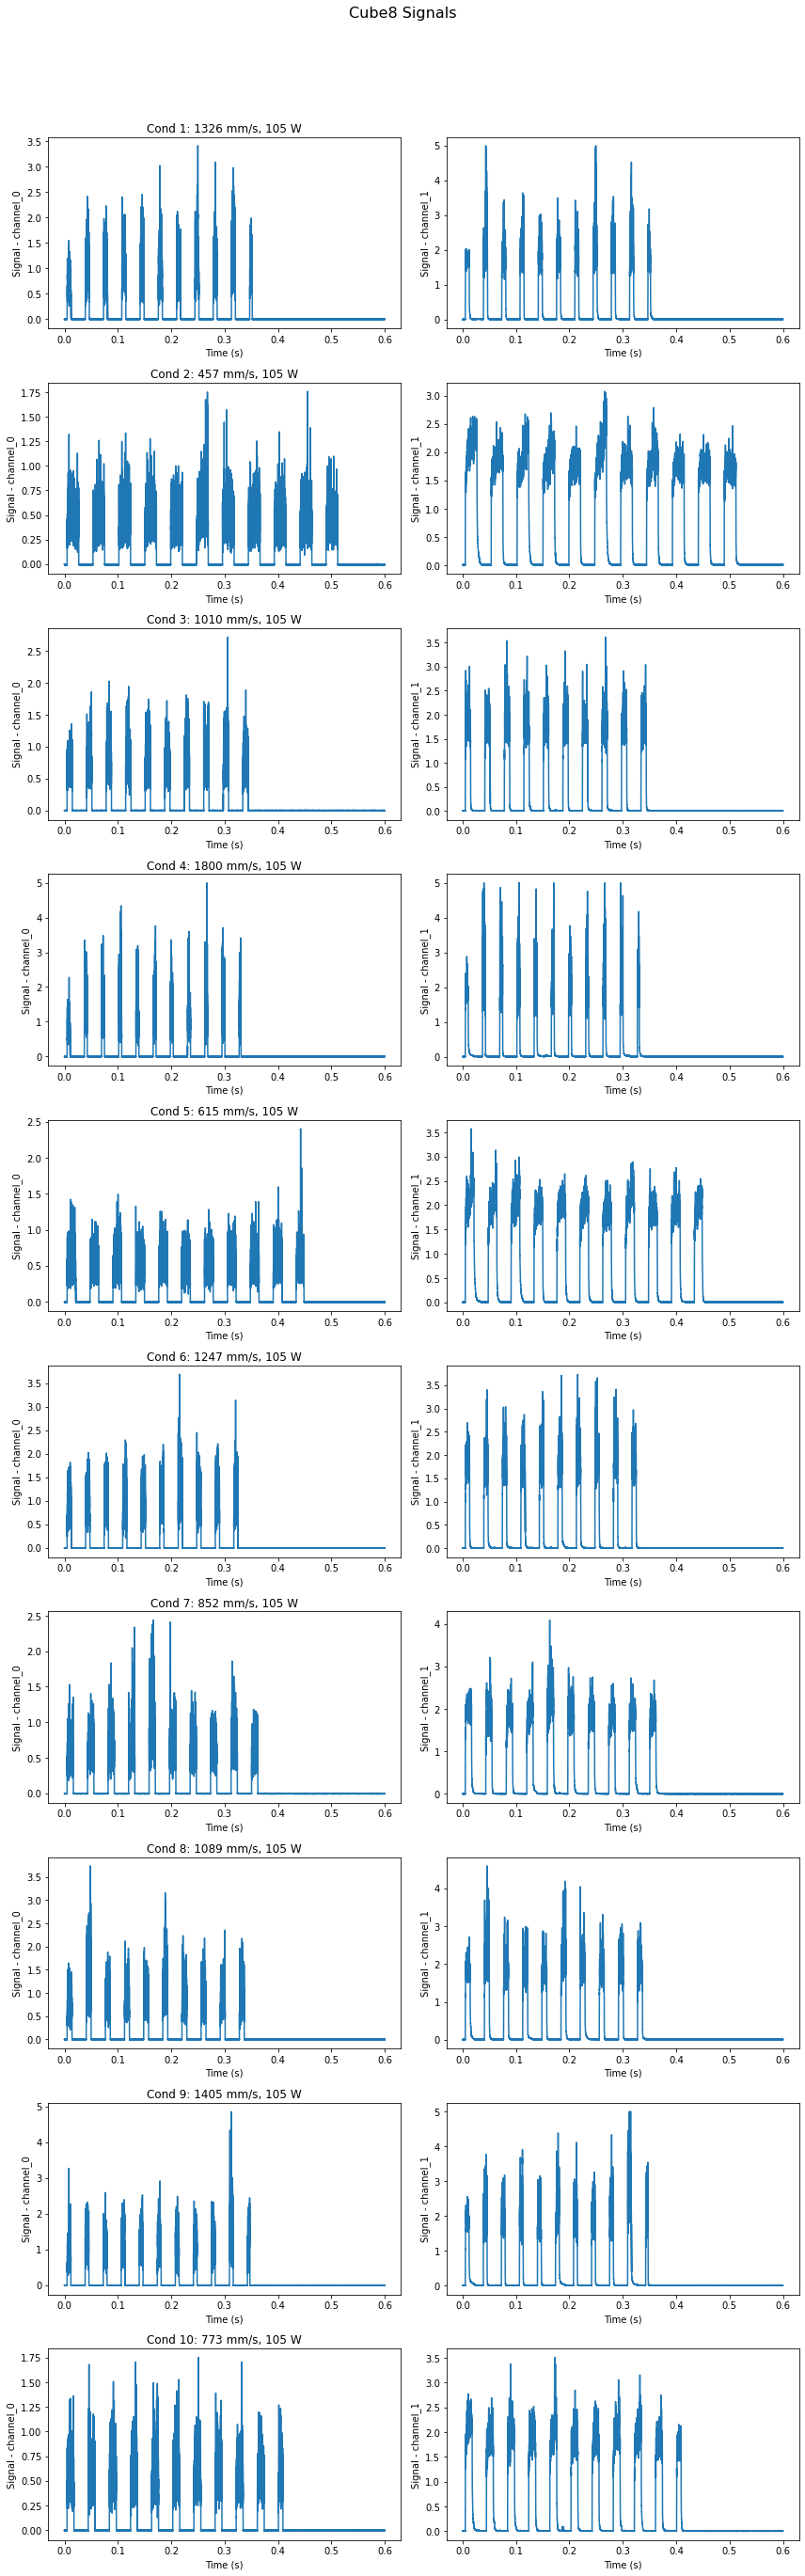

In [6]:
plot_cube_signals(8) # Cube F


In [ ]:
# plot_cube_signals(9)
